<a href="https://colab.research.google.com/github/VeronicaHeringer/My_Projects-Automat_FBDS/blob/main/FBDS_APP_VV_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTOMATIZAÇÃO DE DOWNLOAD DE SHAPES DE APP´S DE VILA VELHA (ES) DO SITE FBDS

In [ ]:
# Montar o acesso ao Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Importar as bibliotecas

import requests
from bs4 import BeautifulSoup


In [ ]:
# Definir uma variável com o endereço do geoftp (FBDS)
url='https://geo.fbds.org.br/ES/VILA_VELHA/APP/'

In [ ]:
# Obter o conteúdo da webpage
r=requests.get(url)

In [ ]:
# Aplicar um parser para organizar o conteúdo em formato de dicionário
soup=BeautifulSoup(r.text, 'html.parser')

In [ ]:
# Inspecionar o resultado
print(soup)

<!DOCTYPE html>

<html class="no-js" lang="pt-br">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<title>FBDS - Repositório de mapas</title>
<meta content="Repositório público de mapas e shapefiles para download" name="description"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="/_h5ai/public/images/favicon/favicon-16-32.ico" rel="shortcut icon"/>
<link href="/_h5ai/public/images/favicon/favicon-152.png" rel="apple-touch-icon-precomposed" type="image/png"/>
<link href="/_h5ai/public/css/styles.css" rel="stylesheet"/>
<script data-module="index" src="/_h5ai/public/js/scripts.js"></script>
<link class="x-head" href="//fonts.googleapis.com/css?family=Ubuntu:300,400,700%7CUbuntu+Mono:400,700" rel="stylesheet"/><link class="x-head" href="/_h5ai/public/ext/estilos.css" rel="stylesheet"/><style class="x-head">#root,input,select{font-family:"Ubuntu","Roboto","Helvetica","Arial","sans-serif"!important}pre,code{font-famil

In [ ]:
# Criar uma lista vazia pra conter urls

urls=[]

# Em html a tag define um link. Usar o findall pra encontrar as tags

for link in soup.find_all('a'):
  urls.append(link.get('href'))

In [ ]:
urls

['http://browsehappy.com',
 'https://larsjung.de/h5ai/',
 '..',
 '/ES/VILA_VELHA/APP/ES_3205200_APP.cpg',
 '/ES/VILA_VELHA/APP/ES_3205200_APP.dbf',
 '/ES/VILA_VELHA/APP/ES_3205200_APP.prj',
 '/ES/VILA_VELHA/APP/ES_3205200_APP.shp',
 '/ES/VILA_VELHA/APP/ES_3205200_APP.shp.xml',
 '/ES/VILA_VELHA/APP/ES_3205200_APP.shx',
 '/ES/VILA_VELHA/APP/ES_3205200_APP_USO.cpg',
 '/ES/VILA_VELHA/APP/ES_3205200_APP_USO.dbf',
 '/ES/VILA_VELHA/APP/ES_3205200_APP_USO.prj',
 '/ES/VILA_VELHA/APP/ES_3205200_APP_USO.shp',
 '/ES/VILA_VELHA/APP/ES_3205200_APP_USO.shp.xml',
 '/ES/VILA_VELHA/APP/ES_3205200_APP_USO.shx']

In [ ]:
# Definir o caminho da pasta onde será salvo os dados baixados (shapes)

outdir="/content/drive/MyDrive/Colab Notebooks/FBDS_TESTE/SHP_VILA_VELHA/"

# Importar as biblio
import os
import urllib
import urllib.request
from tqdm import tqdm

In [ ]:
import geopandas as gpd

In [ ]:
# Criar um loop pelas urls para baixar os arquivos
# Tqdm será usado para monitorar o progresso dos downloads

for u in tqdm(urls):
    # Verifique se o nome do arquivo começa com /ES/VILA_VELHA
    if u.startswith('/ES/'):
          end="https://geo.fbds.org.br"+u
          outfp=outdir+u.split("/")[-1]
      #os.path.join(outdir,u)
          if not os.path.exists(outdir):
            os.makedirs(outdir)
          if not os.path.exists(outfp):
            print("Baixando", u)
            r=urllib.request.urlretrieve(end, outfp)

  0%|          | 0/15 [00:00<?, ?it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP.cpg


 27%|██▋       | 4/15 [00:00<00:02,  4.14it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP.dbf


 33%|███▎      | 5/15 [00:01<00:03,  2.66it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP.prj


 40%|████      | 6/15 [00:02<00:03,  2.53it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP.shp


 47%|████▋     | 7/15 [00:03<00:04,  1.67it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP.shp.xml


 53%|█████▎    | 8/15 [00:04<00:04,  1.57it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP.shx


 60%|██████    | 9/15 [00:04<00:03,  1.71it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP_USO.cpg


 67%|██████▋   | 10/15 [00:04<00:02,  1.84it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP_USO.dbf


 73%|███████▎  | 11/15 [00:06<00:02,  1.41it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP_USO.prj


 80%|████████  | 12/15 [00:06<00:01,  1.57it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP_USO.shp


 87%|████████▋ | 13/15 [00:07<00:01,  1.21it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP_USO.shp.xml


 93%|█████████▎| 14/15 [00:08<00:00,  1.33it/s]

Baixando /ES/VILA_VELHA/APP/ES_3205200_APP_USO.shx


100%|██████████| 15/15 [00:08<00:00,  1.71it/s]


In [ ]:
shapefile="/content/drive/MyDrive/Colab Notebooks/FBDS_TESTE/SHP_VILA_VELHA/ES_3205200_APP.shp"

In [ ]:
# Realizando a leitura do shape

app=gpd.read_file(shapefile)

In [ ]:
app

,GEOCODIGO,MUNICIPIO,UF,CD_UF,HIDRO,APP_M,AREA_HA,geometry
0,3205200,VILA VELHA,ES,32,curso d'água (0 - 10m),30,0.537539,"POLYGON ((356426.589 7728655.085, 356418.04 77..."
1,3205200,VILA VELHA,ES,32,curso d'água (0 - 10m),30,0.003883,"POLYGON ((356529.751 7728980.072, 356527.38 77..."
2,3205200,VILA VELHA,ES,32,curso d'água (0 - 10m),30,8.837240,"POLYGON ((356189.169 7730250.586, 356186.533 7..."
3,3205200,VILA VELHA,ES,32,curso d'água (0 - 10m),30,3.446360,"POLYGON ((353241.187 7731137.82, 353311.019 77..."
4,3205200,VILA VELHA,ES,32,curso d'água (0 - 10m),30,0.001307,"POLYGON ((353510.469 7731360.962, 353512.911 7..."
...,...,...,...,...,...,...,...,...
297,3205200,VILA VELHA,ES,32,nascente,50,0.765367,"POLYGON ((358868.736 7745766.241, 358868.056 7..."
298,3205200,VILA VELHA,ES,32,nascente,50,0.765367,"POLYGON ((359257.202 7746080.259, 359238.067 7..."
299,3205200,VILA VELHA,ES,32,nascente,50,0.765367,"POLYGON ((360995.417 7746976.688, 360976.283 7..."
300,3205200,VILA VELHA,ES,32,nascente,50,0.765367,"POLYGON ((363088.822 7747076.7, 363077.187 774..."


In [ ]:
app.shape

(302, 8)

In [ ]:
type(app)

geopandas.geodataframe.GeoDataFrame

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

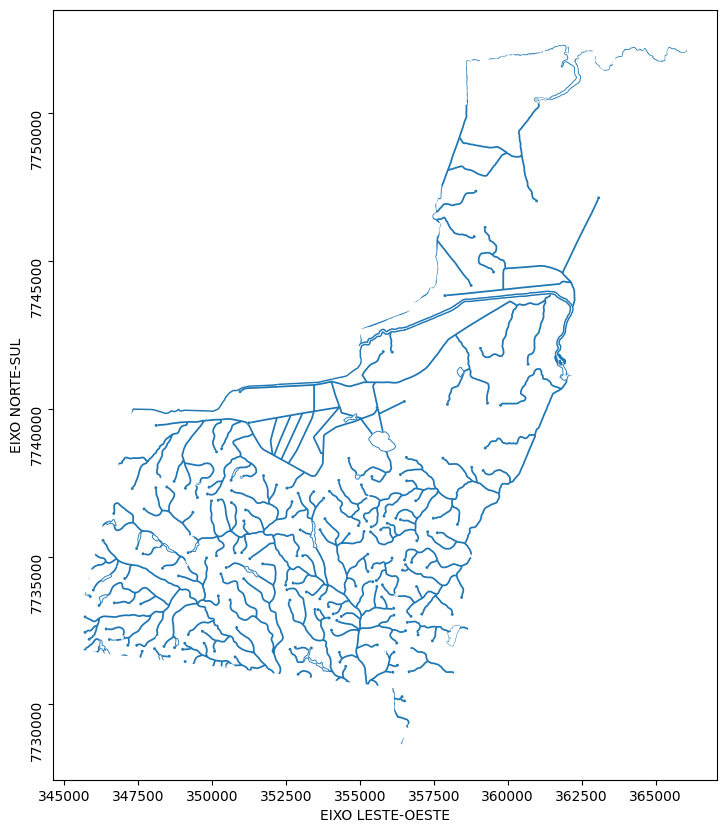

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
app.plot(ax=ax)
ax.set_ylabel('EIXO NORTE-SUL')
ax.set_xlabel('EIXO LESTE-OESTE')
ax.ticklabel_format(style='plain')
plt.yticks(rotation=90)
plt.show
